🚢 TITANIC DATASET ANALYSIS
✅ Data loaded successfully!

📊 DATASET OVERVIEW
Dataset shape: (887, 8)
Memory usage: 0.16 MB

Column Information:
Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

First 5 rows:
   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0            

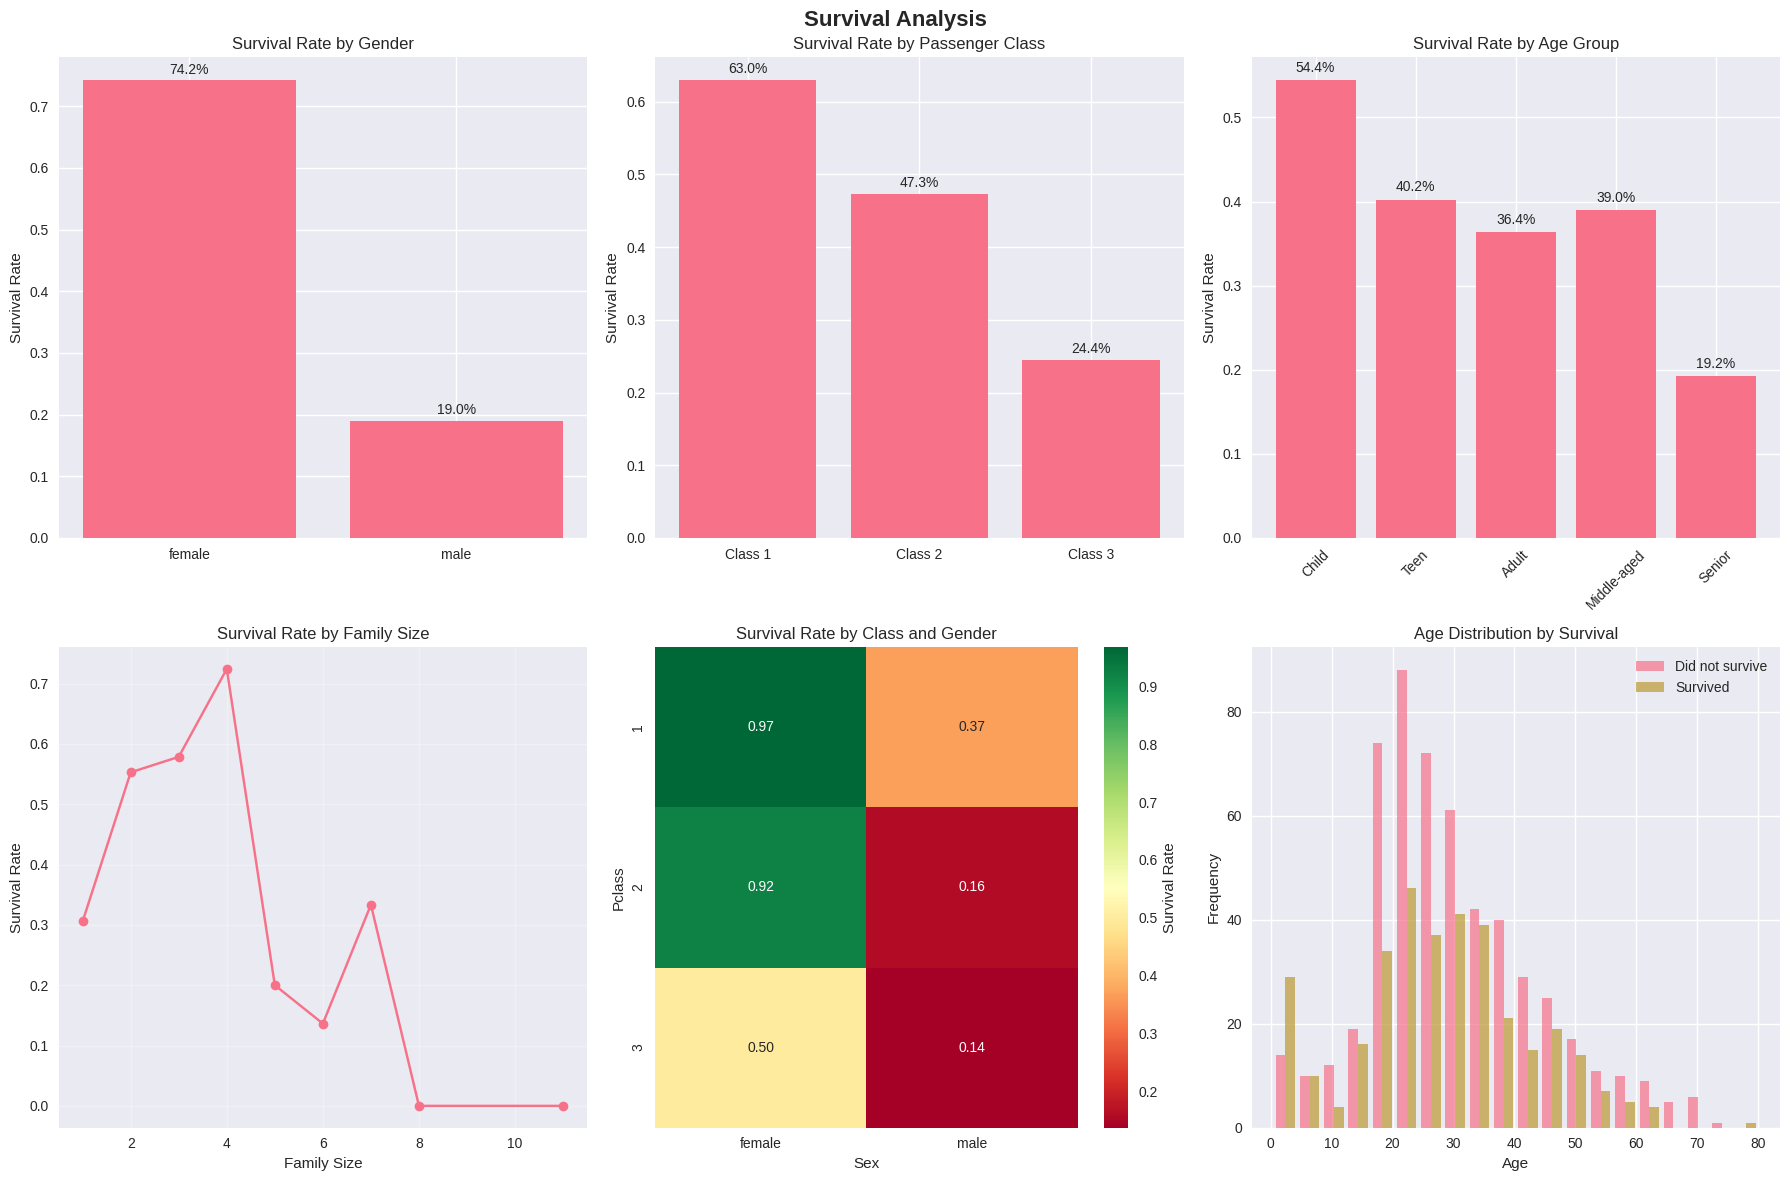


🔗 CORRELATION ANALYSIS


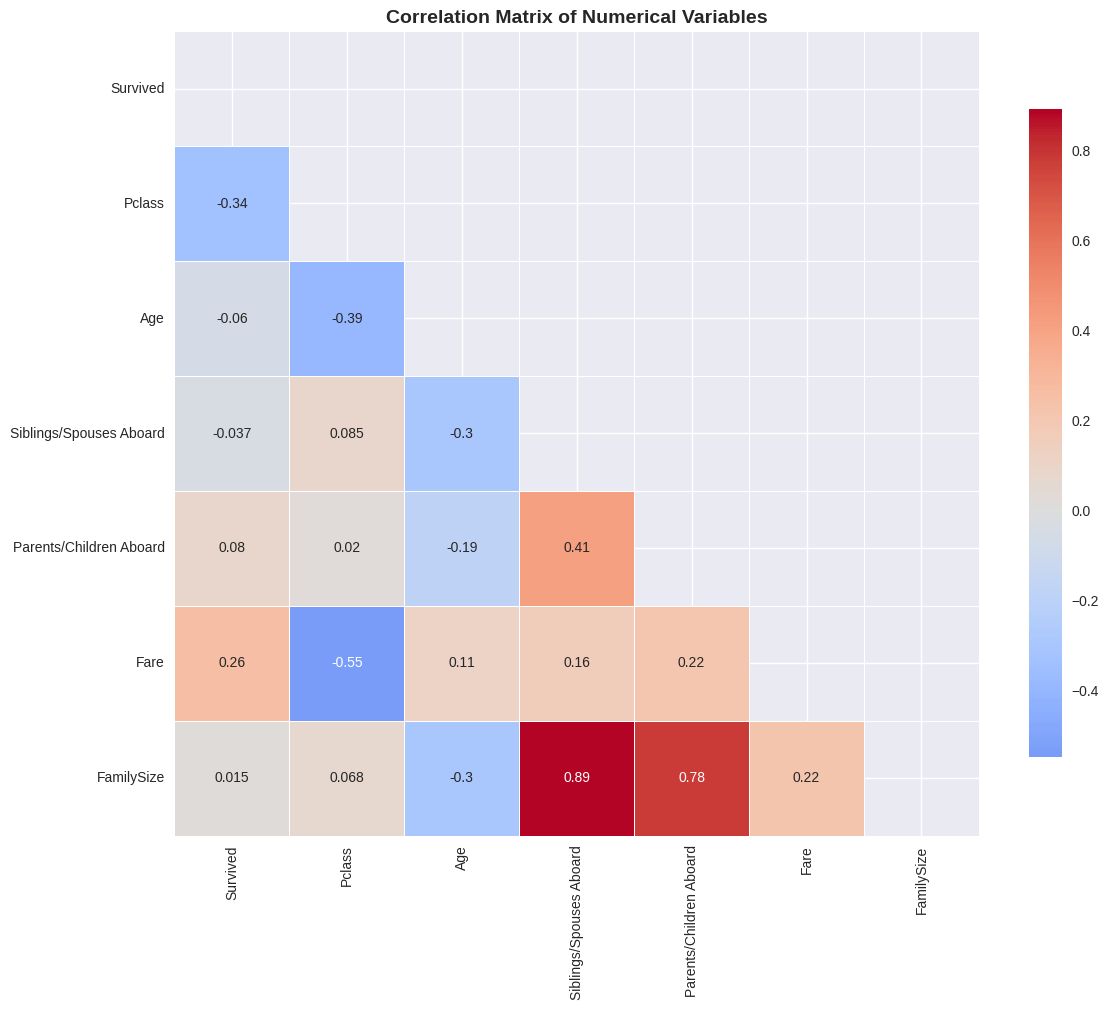


Correlation with Survival (absolute values):
Pclass                     0.336528
Fare                       0.256179
Parents/Children Aboard    0.080097
Age                        0.059665
Siblings/Spouses Aboard    0.037082
FamilySize                 0.014673
Name: Survived, dtype: float64

💰 FARE ANALYSIS


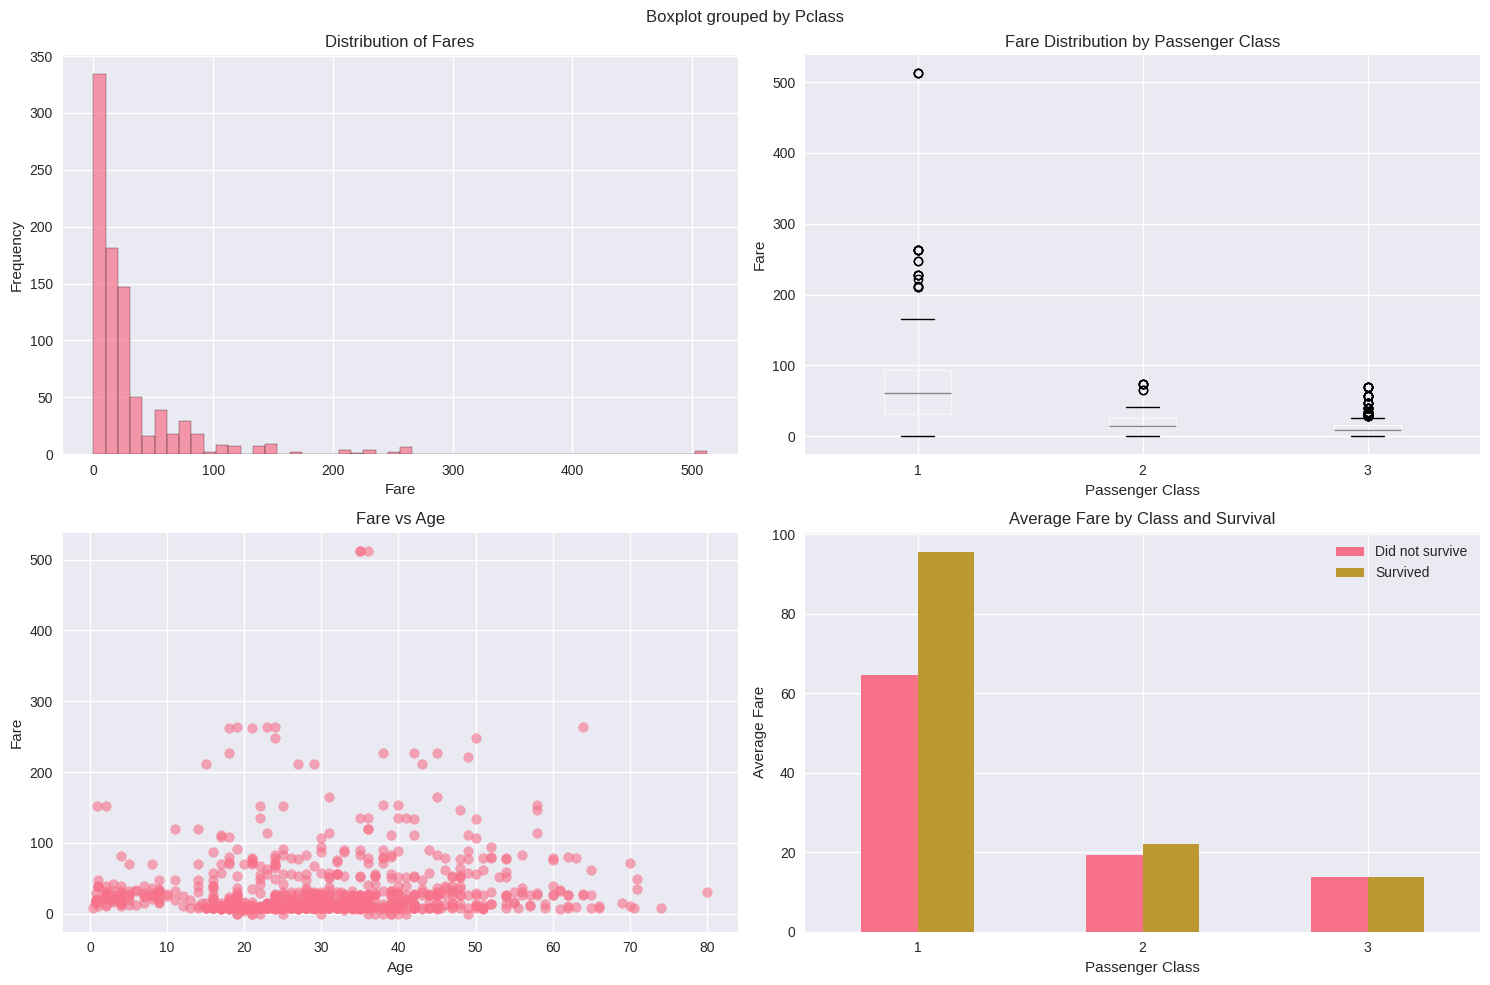


Fare Statistics by Class:
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       487.0  13.707707  11.817309  0.0   7.75000   8.0500  15.5   69.5500

🔍 ADVANCED PATTERN ANALYSIS

Survival Rate by Title:
       Count  Survival_Rate
Title                      
Rare     887          0.386

Survival Rate by Family Size:
            Count  Survival_Rate
FamilySize                      
1             533          0.306
2             161          0.553
3             102          0.578
4              29          0.724
5              15          0.200
6              22          0.136
7              12          0.333
8               6          0.000
11              7          0.000

Statistical Tests:
Gender vs Survival - Chi-square: 258.391,

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the data
def load_titanic_data(file_path='titanic.csv'):
    """Load and return the Titanic dataset"""
    try:
        df = pd.read_csv(file_path)
        print("✅ Data loaded successfully!")
        return df
    except FileNotFoundError:
        print("❌ File not found. Please ensure 'titanic.csv' is in the current directory.")
        return None

# Data cleaning functions
def clean_data(df):
    """Perform comprehensive data cleaning"""
    print("\n🧹 STARTING DATA CLEANING...")
    print("="*50)

    # Create a copy to avoid modifying original
    df_clean = df.copy()

    # 1. Handle missing values
    print("\n1. Missing Values Analysis:")
    missing_counts = df_clean.isnull().sum()
    missing_percent = (missing_counts / len(df_clean)) * 100

    missing_df = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing Percentage': missing_percent
    }).sort_values('Missing Count', ascending=False)

    print(missing_df[missing_df['Missing Count'] > 0])

    # Fill missing Age values with median by passenger class
    df_clean['Age'].fillna(df_clean.groupby('Pclass')['Age'].transform('median'), inplace=True)

    # Fill missing Fare values with median
    df_clean['Fare'].fillna(df_clean['Fare'].median(), inplace=True)

    # 2. Create new features
    print("\n2. Feature Engineering:")

    # Extract title from name
    df_clean['Title'] = df_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

    # Group rare titles
    title_mapping = {
        'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
        'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
        'Mlle': 'Miss', 'Countess': 'Rare', 'Ms': 'Miss', 'Lady': 'Rare',
        'Jonkheer': 'Rare', 'Don': 'Rare', 'Dona': 'Rare', 'Mme': 'Mrs',
        'Capt': 'Rare', 'Sir': 'Rare'
    }
    df_clean['Title'] = df_clean['Title'].map(title_mapping)
    df_clean['Title'].fillna('Rare', inplace=True)

    # Create family size feature
    df_clean['FamilySize'] = df_clean['Siblings/Spouses Aboard'] + df_clean['Parents/Children Aboard'] + 1

    # Create family type feature
    df_clean['FamilyType'] = pd.cut(df_clean['FamilySize'],
                                   bins=[0, 1, 4, 20],
                                   labels=['Solo', 'Small', 'Large'])

    # Create age groups
    df_clean['AgeGroup'] = pd.cut(df_clean['Age'],
                                 bins=[0, 12, 18, 35, 60, 100],
                                 labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])

    # Create fare groups
    df_clean['FareGroup'] = pd.qcut(df_clean['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

    print("✅ New features created: Title, FamilySize, FamilyType, AgeGroup, FareGroup")

    # 3. Data type optimization
    categorical_cols = ['Sex', 'Title', 'FamilyType', 'AgeGroup', 'FareGroup']
    for col in categorical_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].astype('category')

    print("✅ Data types optimized")
    print(f"✅ Dataset shape after cleaning: {df_clean.shape}")

    return df_clean

def basic_info(df):
    """Display basic information about the dataset"""
    print("\n📊 DATASET OVERVIEW")
    print("="*50)
    print(f"Dataset shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    print("\nColumn Information:")
    print(df.dtypes)

    print("\nFirst 5 rows:")
    print(df.head())

    print("\nBasic Statistics:")
    print(df.describe())

def survival_analysis(df):
    """Analyze survival patterns"""
    print("\n⚰️ SURVIVAL ANALYSIS")
    print("="*50)

    # Overall survival rate
    survival_rate = df['Survived'].mean()
    print(f"Overall Survival Rate: {survival_rate:.1%}")

    # Create subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Survival Analysis', fontsize=16, fontweight='bold')

    # 1. Survival by Gender
    survival_by_gender = df.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean'])
    survival_by_gender.columns = ['Total', 'Survived', 'Survival_Rate']

    axes[0,0].bar(survival_by_gender.index, survival_by_gender['Survival_Rate'])
    axes[0,0].set_title('Survival Rate by Gender')
    axes[0,0].set_ylabel('Survival Rate')
    for i, v in enumerate(survival_by_gender['Survival_Rate']):
        axes[0,0].text(i, v + 0.01, f'{v:.1%}', ha='center')

    # 2. Survival by Class
    survival_by_class = df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean'])
    survival_by_class.columns = ['Total', 'Survived', 'Survival_Rate']

    axes[0,1].bar(range(len(survival_by_class)), survival_by_class['Survival_Rate'])
    axes[0,1].set_title('Survival Rate by Passenger Class')
    axes[0,1].set_ylabel('Survival Rate')
    axes[0,1].set_xticks(range(len(survival_by_class)))
    axes[0,1].set_xticklabels([f'Class {i}' for i in survival_by_class.index])
    for i, v in enumerate(survival_by_class['Survival_Rate']):
        axes[0,1].text(i, v + 0.01, f'{v:.1%}', ha='center')

    # 3. Survival by Age Group
    if 'AgeGroup' in df.columns:
        survival_by_age = df.groupby('AgeGroup')['Survived'].mean()
        axes[0,2].bar(range(len(survival_by_age)), survival_by_age.values)
        axes[0,2].set_title('Survival Rate by Age Group')
        axes[0,2].set_ylabel('Survival Rate')
        axes[0,2].set_xticks(range(len(survival_by_age)))
        axes[0,2].set_xticklabels(survival_by_age.index, rotation=45)
        for i, v in enumerate(survival_by_age.values):
            axes[0,2].text(i, v + 0.01, f'{v:.1%}', ha='center')

    # 4. Survival by Family Size
    if 'FamilySize' in df.columns:
        survival_by_family = df.groupby('FamilySize')['Survived'].mean()
        axes[1,0].plot(survival_by_family.index, survival_by_family.values, marker='o')
        axes[1,0].set_title('Survival Rate by Family Size')
        axes[1,0].set_xlabel('Family Size')
        axes[1,0].set_ylabel('Survival Rate')
        axes[1,0].grid(True, alpha=0.3)

    # 5. Survival Heatmap by Class and Gender
    survival_crosstab = pd.crosstab(df['Pclass'], df['Sex'], df['Survived'], aggfunc='mean')
    sns.heatmap(survival_crosstab, annot=True, fmt='.2f', cmap='RdYlGn',
                ax=axes[1,1], cbar_kws={'label': 'Survival Rate'})
    axes[1,1].set_title('Survival Rate by Class and Gender')

    # 6. Age distribution by survival
    axes[1,2].hist([df[df['Survived']==0]['Age'].dropna(),
                    df[df['Survived']==1]['Age'].dropna()],
                   bins=20, alpha=0.7, label=['Did not survive', 'Survived'])
    axes[1,2].set_title('Age Distribution by Survival')
    axes[1,2].set_xlabel('Age')
    axes[1,2].set_ylabel('Frequency')
    axes[1,2].legend()

    plt.tight_layout()
    plt.show()

    return survival_by_gender, survival_by_class

def correlation_analysis(df):
    """Analyze correlations between variables"""
    print("\n🔗 CORRELATION ANALYSIS")
    print("="*50)

    # Select numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # Calculate correlation matrix
    corr_matrix = df[numerical_cols].corr()

    # Create correlation heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix of Numerical Variables', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Find strong correlations with survival
    survival_corr = corr_matrix['Survived'].abs().sort_values(ascending=False)
    print("\nCorrelation with Survival (absolute values):")
    print(survival_corr[1:])  # Exclude self-correlation

    return corr_matrix

def fare_analysis(df):
    """Analyze fare patterns"""
    print("\n💰 FARE ANALYSIS")
    print("="*50)

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Fare Analysis', fontsize=16, fontweight='bold')

    # 1. Fare distribution
    axes[0,0].hist(df['Fare'], bins=50, edgecolor='black', alpha=0.7)
    axes[0,0].set_title('Distribution of Fares')
    axes[0,0].set_xlabel('Fare')
    axes[0,0].set_ylabel('Frequency')

    # 2. Fare by class
    df.boxplot(column='Fare', by='Pclass', ax=axes[0,1])
    axes[0,1].set_title('Fare Distribution by Passenger Class')
    axes[0,1].set_xlabel('Passenger Class')
    axes[0,1].set_ylabel('Fare')

    # 3. Fare vs Age
    axes[1,0].scatter(df['Age'], df['Fare'], alpha=0.6)
    axes[1,0].set_title('Fare vs Age')
    axes[1,0].set_xlabel('Age')
    axes[1,0].set_ylabel('Fare')

    # 4. Average fare by survival and class
    fare_survival = df.groupby(['Pclass', 'Survived'])['Fare'].mean().reset_index()
    fare_pivot = fare_survival.pivot(index='Pclass', columns='Survived', values='Fare')
    fare_pivot.plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Average Fare by Class and Survival')
    axes[1,1].set_xlabel('Passenger Class')
    axes[1,1].set_ylabel('Average Fare')
    axes[1,1].legend(['Did not survive', 'Survived'])
    axes[1,1].tick_params(axis='x', rotation=0)

    plt.tight_layout()
    plt.show()

    # Statistical analysis
    print("\nFare Statistics by Class:")
    print(df.groupby('Pclass')['Fare'].describe())

def advanced_patterns(df):
    """Identify advanced patterns and insights"""
    print("\n🔍 ADVANCED PATTERN ANALYSIS")
    print("="*50)

    # 1. Survival rate by title
    if 'Title' in df.columns:
        title_survival = df.groupby('Title')['Survived'].agg(['count', 'mean']).round(3)
        title_survival.columns = ['Count', 'Survival_Rate']
        print("\nSurvival Rate by Title:")
        print(title_survival.sort_values('Survival_Rate', ascending=False))

    # 2. Family size impact
    if 'FamilySize' in df.columns:
        family_survival = df.groupby('FamilySize')['Survived'].agg(['count', 'mean']).round(3)
        family_survival.columns = ['Count', 'Survival_Rate']
        print("\nSurvival Rate by Family Size:")
        print(family_survival)

    # 3. Statistical tests
    print("\nStatistical Tests:")

    # Chi-square test for categorical variables
    from scipy.stats import chi2_contingency

    # Gender vs Survival
    gender_survival_ct = pd.crosstab(df['Sex'], df['Survived'])
    chi2, p_value, dof, expected = chi2_contingency(gender_survival_ct)
    print(f"Gender vs Survival - Chi-square: {chi2:.3f}, p-value: {p_value:.6f}")

    # Class vs Survival
    class_survival_ct = pd.crosstab(df['Pclass'], df['Survived'])
    chi2, p_value, dof, expected = chi2_contingency(class_survival_ct)
    print(f"Class vs Survival - Chi-square: {chi2:.3f}, p-value: {p_value:.6f}")

    # T-test for age difference between survivors and non-survivors
    survivors_age = df[df['Survived'] == 1]['Age'].dropna()
    non_survivors_age = df[df['Survived'] == 0]['Age'].dropna()
    t_stat, p_value = stats.ttest_ind(survivors_age, non_survivors_age)
    print(f"Age difference (t-test) - t-statistic: {t_stat:.3f}, p-value: {p_value:.6f}")

def generate_insights(df):
    """Generate key insights from the analysis"""
    print("\n💡 KEY INSIGHTS")
    print("="*50)

    insights = []

    # Overall survival rate
    overall_survival = df['Survived'].mean()
    insights.append(f"Overall survival rate was {overall_survival:.1%}")

    # Gender analysis
    female_survival = df[df['Sex'] == 'female']['Survived'].mean()
    male_survival = df[df['Sex'] == 'male']['Survived'].mean()
    insights.append(f"Female survival rate ({female_survival:.1%}) was {female_survival/male_survival:.1f}x higher than male survival rate ({male_survival:.1%})")

    # Class analysis
    class_survival = df.groupby('Pclass')['Survived'].mean()
    insights.append(f"First-class passengers had the highest survival rate ({class_survival[1]:.1%}), followed by second-class ({class_survival[2]:.1%}) and third-class ({class_survival[3]:.1%})")

    # Age analysis
    child_survival = df[df['Age'] < 12]['Survived'].mean()
    adult_survival = df[(df['Age'] >= 12) & (df['Age'] < 60)]['Survived'].mean()
    insights.append(f"Children under 12 had a survival rate of {child_survival:.1%} compared to {adult_survival:.1%} for adults")

    # Family size analysis
    if 'FamilySize' in df.columns:
        solo_survival = df[df['FamilySize'] == 1]['Survived'].mean()
        small_family_survival = df[(df['FamilySize'] > 1) & (df['FamilySize'] <= 4)]['Survived'].mean()
        large_family_survival = df[df['FamilySize'] > 4]['Survived'].mean()
        insights.append(f"Small families (2-4 members) had the highest survival rate ({small_family_survival:.1%}), compared to solo travelers ({solo_survival:.1%}) and large families ({large_family_survival:.1%})")

    # Print insights
    for i, insight in enumerate(insights, 1):
        print(f"{i}. {insight}")

def main():
    """Main function to run the complete analysis"""
    print("🚢 TITANIC DATASET ANALYSIS")
    print("="*60)

    # Load data
    df = load_titanic_data()
    if df is None:
        return

    # Basic information
    basic_info(df)

    # Clean data
    df_clean = clean_data(df)

    # Perform analyses
    survival_stats = survival_analysis(df_clean)
    correlation_matrix = correlation_analysis(df_clean)
    fare_analysis(df_clean)
    advanced_patterns(df_clean)
    generate_insights(df_clean)

    print("\n✅ Analysis completed successfully!")
    print("\nTo run this analysis:")
    print("1. Save this code as 'titanic_analysis.py'")
    print("2. Ensure 'titanic.csv' is in the same directory")
    print("3. Run: python titanic_analysis.py")

    return df_clean

# Run the analysis
if __name__ == "__main__":
    cleaned_data = main()